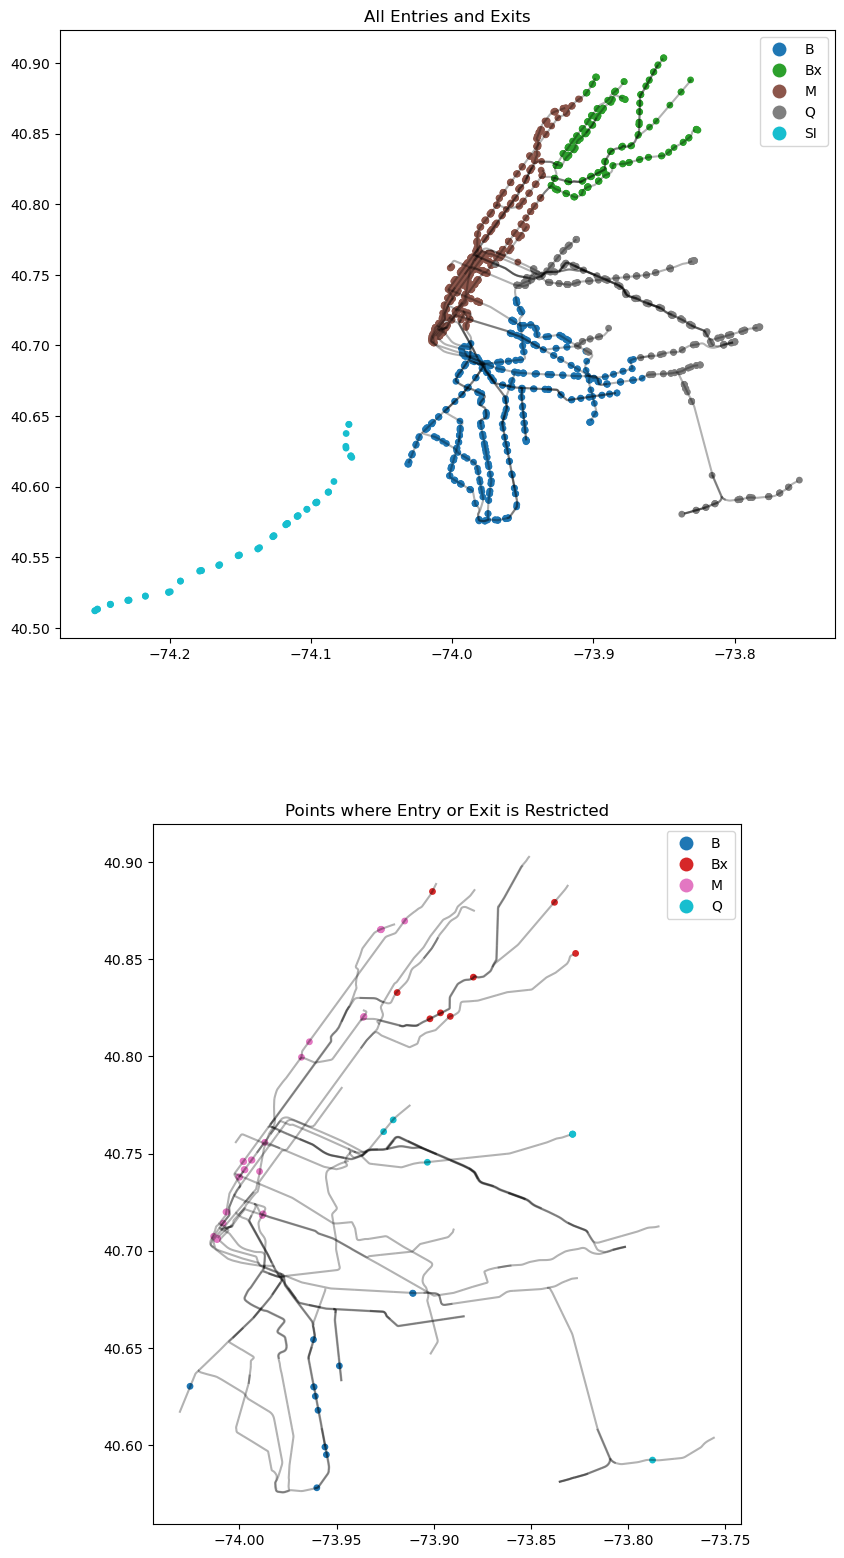

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the shapefile using pyogrio
# source: https://data.cityofnewyork.us/Transportation/Subway-Lines/3qz8-muuu
shapefile_path = 'data/Subway Lines/geo_export_a43cfd92-dc9c-4159-91f6-934c58291474.shp'
gdf = gpd.read_file(shapefile_path, engine='pyogrio')

# Load the CSV file into a DataFrame
# source: https://data.ny.gov/Transportation/MTA-Subway-Entrances-and-Exits-2024/i9wp-a4ja/about_data
csv_file_path = 'data/MTA_Subway_Entrances_and_Exits__2024_20250118.csv'
df = pd.read_csv(csv_file_path)

# Create a GeoDataFrame from the DataFrame with latitude and longitude
gdf_points = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Entrance Longitude'], df['Entrance Latitude']))

# Filter points where entry or exit is restricted
restricted_points = gdf_points[(df['Entry Allowed'] == "NO") | (df['Exit Allowed'] == "NO")]

# Create a figure with two subplots, one on top of the other
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 20))

# Plot all points on the first subplot
gdf.plot(ax=ax1, color='black', edgecolor='black', alpha = .3)
gdf_points.plot(ax=ax1, column='Borough', legend=True, markersize=15)
ax1.set_title('All Entries and Exits')

# Plot restricted points on the second subplot
gdf.plot(ax=ax2, color='black', edgecolor='black', alpha = .3)
restricted_points.plot(ax=ax2, column='Borough', legend=True, markersize=15)
ax2.set_title('Points where Entry or Exit is Restricted')

plt.show()